In [6]:
import numpy
from etrade.spot.forecast.plan_a.simulator2 import WeightGaussianMarketSimulator
from etrade.spot.trader import Station
from etrade.spot.market.recycle import BasicRecycle, PointwiseRecycle
from etrade.spot.forecast.market import DistributiveSeries, DistributiveMarket
from etrade.spot.forecast.plan_a.constructor import *
from etrade.spot.forecast.yieldindex import zero_quantile
from etrade.spot.forecast import yieldindex
from  data_utils.stochastic_utils.vdistributions.abstract import AbstractDistribution, eps
from  data_utils.stochastic_utils.vdistributions.parameter.continuous.basic import NormalDistribution, SkewNormalDistribution
from data_utils.stochastic_utils.vdistributions.nonparametric.continuous.kernel2 import KernelMixDistribution
from data_utils.stochastic_utils.vdistributions.tools.divergence import kl_divergence_continuous, crps, quantile_RMSE, js_divergence_continuous

from data_utils.stochastic_utils.vdistributions.nonparametric.continuous.mfk.skewnd2 import dof_snd_fitter

from scipy.optimize import differential_evolution

from matplotlib import pyplot
import json

In [7]:
init_kwargs = {
    "aq_constructor": OrdinaryGaussianKernelDistributionConstructor((0, 50), (1, 10), (1, 3)),
    "dp_constructor": OrdinaryGaussianKernelDistributionConstructor((0, 10), (1, 10), (1, 3)),
    "rp_constructor": OrdinaryGaussianKernelDistributionConstructor((0, 10), (1, 10), (1, 3)),
    "aq_range": (0, 50),
    "dp_range": (0, 1e+6),
    "rp_range": (0, 1e+6),
    # "real_market": 1000,
    # "noise_weight": 0,
    # "market_len": 1,
    # "kernel_num": None
    "noise_weight": numpy.full((3,4), 0.0)
}
s = Station("station", 50)
br = PointwiseRecycle(0.5, 1.05)

In [8]:
ms = WeightGaussianMarketSimulator(**init_kwargs)

In [9]:
ms.noise_weight

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

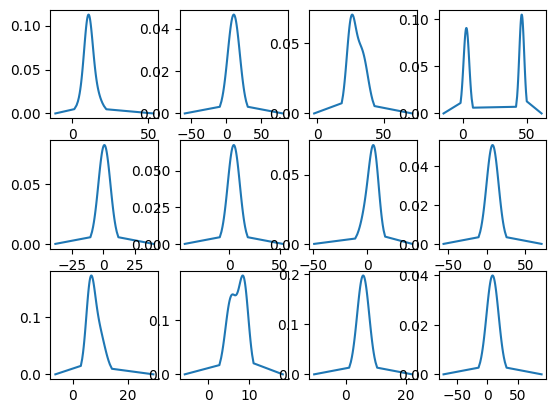

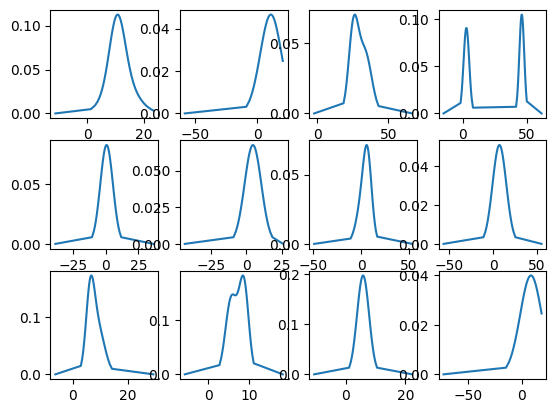

In [10]:
ms.real_market.plot()
ms.predicted_market.plot()